In [1]:
import pandas as pd
import mwparserfromhell
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
df_comment = pd.read_csv('wiki-RFA.csv', index_col=0, parse_dates=['Date'])

In [12]:
#replace nan values by [] for futur operation
df_comment['Comment'] = df_comment['Comment'].apply(lambda x: [] if pd.isna(x) else x)
df_comment["Parsed_Comment"] = df_comment.Comment.apply(lambda x: mwparserfromhell.parse(x).strip_code())
df_comment

,Source,Target,Vote,Results,Year,Date,Comment,Parsed_Comment
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.,Support as co-nom.
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--,Support as nominator.--
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.,Support per noms.
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...,Support per noms. BDD is a strong contributor ...
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit...","Support, with great pleasure. I work with BDD ..."
...,...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,2003-09-02 02:51:00,Support,Support
198271,Angela,WhisperToMe,1,1,2003,2003-11-26 23:45:00,Support.,Support.
198272,Jiang,WhisperToMe,1,1,2003,NaT,Support. --,Support. --
198273,Pakaran,WhisperToMe,1,1,2003,2003-12-05 05:38:00,Support. Age has nothing to do with maturity....,Support. Age has nothing to do with maturity....


In [13]:
#Initialize a dataframe containing only relevant info for futur comment analysis
stat_df = pd.DataFrame(columns = ['Source','Vote', 'Comment', 'Parsed_Comment'])
stat_df['Vote']=df_comment['Vote']
stat_df['Source']=df_comment['Source']
stat_df['Comment'] = df_comment['Comment']
stat_df['Parsed_Comment']=df_comment['Parsed_Comment']

In [14]:
#Count the number of word occurrence without taking into account sop words (the, and, me...)
vectorizer = CountVectorizer(stop_words='english')
stat_df['Vectorized_Comment'] = stat_df['Parsed_Comment'].apply(lambda x: vectorizer.build_analyzer()(x)) 
stat_df['Vector_Size'] = stat_df['Vectorized_Comment'].apply(lambda x: len(x))
stat_df

,Source,Vote,Comment,Parsed_Comment,Vectorized_Comment,Vector_Size
0,Steel1943,1,'''Support''' as co-nom.,Support as co-nom.,"[support, nom]",2
1,Cuchullain,1,'''Support''' as nominator.--,Support as nominator.--,"[support, nominator]",2
2,INeverCry,1,'''Support''' per noms.,Support per noms.,"[support, noms]",2
3,Cncmaster,1,'''Support''' per noms. BDD is a strong contri...,Support per noms. BDD is a strong contributor ...,"[support, noms, bdd, strong, contributor, thou...",11
4,Miniapolis,1,"'''Support''', with great pleasure. I work wit...","Support, with great pleasure. I work with BDD ...","[support, great, pleasure, work, bdd, guild, c...",18
...,...,...,...,...,...,...
198270,172,1,Support,Support,[support],1
198271,Angela,1,Support.,Support.,[support],1
198272,Jiang,1,Support. --,Support. --,[support],1
198273,Pakaran,1,Support. Age has nothing to do with maturity....,Support. Age has nothing to do with maturity....,"[support, age, maturity]",3


## Comment analysis

In [15]:
print('The minimun length of the comment is: ', np.min(stat_df['Vector_Size']))
print('The maximum length of the comment is: ', np.max(stat_df['Vector_Size']))

proportion_no_comment=np.sum(stat_df['Vector_Size']==0)/len(stat_df['Vector_Size'])*100
print('The percentage of vote without comment is: ', proportion_no_comment)
proportion_one_word=np.sum(stat_df['Vector_Size']==1)/len(stat_df['Vector_Size'])*100
print('The percentage of comment with one word is: ', proportion_one_word)
proportion_two_word=np.sum(stat_df['Vector_Size']==2)/len(stat_df['Vector_Size'])*100
print('The percentage of comment with 2 words is: ', proportion_two_word)

The minimun length of the comment is:  0
The maximum length of the comment is:  473
The percentage of vote without comment is:  4.7106291766485935
The percentage of comment with one word is:  8.764594628672299
The percentage of comment with 2 words is:  6.501071743790191


#### Vote without comment analysis

In [16]:
zero_word = stat_df[stat_df['Vector_Size']==0] #the vectorization removes almost all stop words/non significant words
zero_word

,Source,Vote,Comment,Parsed_Comment,Vectorized_Comment,Vector_Size
51,LlamaAl,1,[],,[],0
156,Rzuwig,1,{{pro}} --,--,[],0
173,LlamaAl,1,[],,[],0
224,Stephen,1,[],,[],0
373,Yash!,1,← &mdash;&nbsp;''',← — ''',[],0
...,...,...,...,...,...,...
198067,Netoholic,-1,[],,[],0
198116,NaN,1,[],,[],0
198171,NaN,1,[],,[],0
198217,NaN,1,[],,[],0


We observe several NaN values as Source name, we then want to see if they represent a large proportion of vote without comment. 

In [17]:
print('The number of Source with missing name is :', zero_word['Source'].isna().sum())
print('This corresponds to a proportion (%) of ', zero_word['Source'].isna().sum()/len(zero_word['Source'])*100)

The number of Source with missing name is : 1661
This corresponds to a proportion (%) of  17.78372591006424


INTERPRETATION A FAIRE EN FONCTION DE COMMENT LE PROCESSING D'EMMA INFLUENCE LE RESULTAT. Actuellement = 17% = pas mal

Since around 4% of votes do not contain any comment, we want to see if there is a specific tendency in the vote (support, opposition or neutral). We could consider that votes without comments are obvious votes subject to less controversy and therefore we could expect to have a large proportion of positive votes.

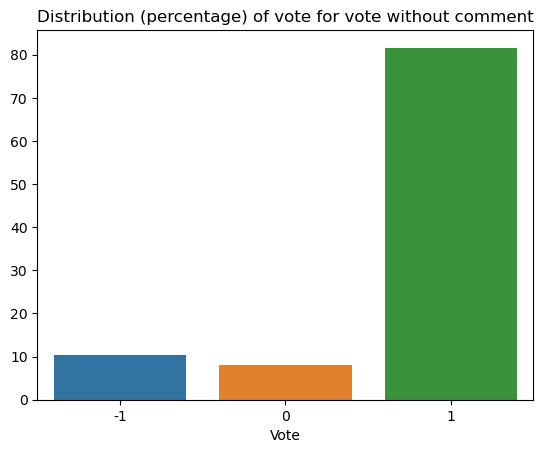

In [18]:
dist_vote_no_comment= zero_word['Vote'].value_counts(normalize=True)*100
sns.barplot(x=dist_vote_no_comment.index, y=dist_vote_no_comment.values)
plt.title('Distribution (percentage) of vote for vote without comment')
plt.show()

We can indeed see that the large majority of votes are positif. 

### One word comment analysis

In [19]:
one_word = stat_df[stat_df['Vector_Size']==1]

print('Proportion of comment of one word', len(one_word['Vector_Size'])/len(stat_df['Vector_Size'])*100)

Proportion of comment of one word 8.764594628672299


As for vote without any comment, we could expect that votes with one word comment are straightforward votes and then we can expect a similar trend to votes without comments

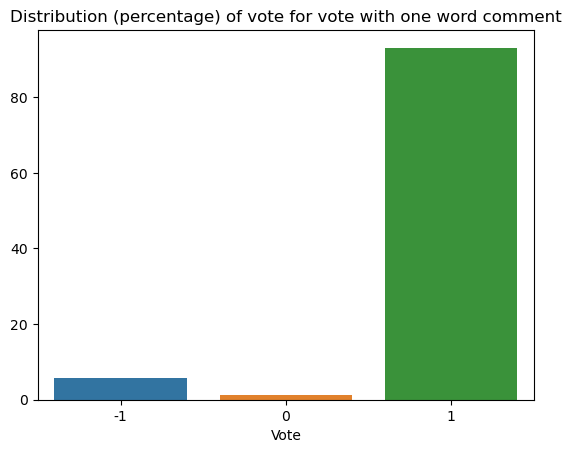

In [44]:
dist_vote_one_word_comment= one_word['Vote'].value_counts(normalize=True)*100
sns.barplot(x=dist_vote_one_word_comment.index, y=dist_vote_one_word_comment.values)
plt.title('Distribution (percentage) of vote for vote with one word comment')
plt.show()

In [10]:
df_one_word = pd.DataFrame(np.concatenate(one_word['Vectorized_Comment'].values), columns=['word']) #handle the list of string type for each row
percentage=df_one_word['word'].value_counts(normalize=True)*100
print('Percentage of the 15 first one word comment:')
percentage[:15]

Percentage of the 15 first one word comment:


word
support       77.954885
oppose         4.304293
yes            1.053056
course         1.007020
sure           0.794107
neutral        0.742318
cool           0.742318
absolutely     0.650247
nom            0.454598
small          0.397054
definitely     0.368282
thought        0.351019
certainly      0.328001
fine           0.310738
nominator      0.281966
Name: proportion, dtype: float64

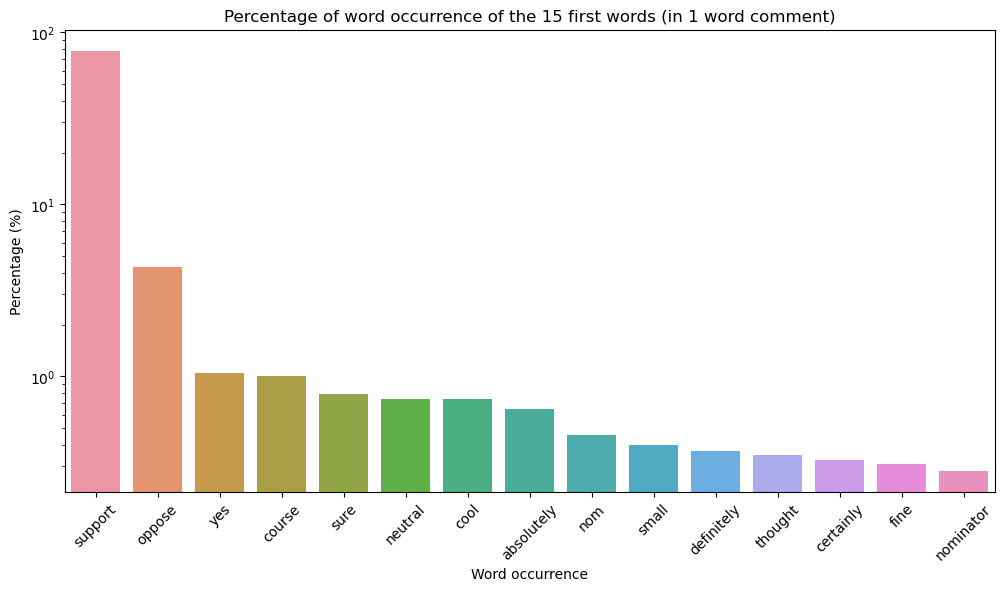

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(x=percentage[:15].index, y=percentage[:15].values)
plt.xticks(rotation=45)
plt.yscale('log')
plt.xlabel('Word occurrence')
plt.ylabel('Percentage (%)')
plt.title('Percentage of word occurrence of the 15 first words (in 1 word comment)')
plt.show()
                           

### 2 words comment analysis

In [20]:
two_words = stat_df[stat_df['Vector_Size']==2]

First we look at word independtly, it means that for each comment we consider that the 2 words are not related

In [21]:
#Look at words individually
df_two_words = pd.DataFrame(np.concatenate(two_words['Vectorized_Comment'].values), columns=['word']) 
percentage_2words_ind=df_two_words['word'].value_counts(normalize=True)*100
print('Percentage of the 15 first words when looking at 2 word comment and considering each word independetly')
percentage_2words_ind[:15]

Percentage of the 15 first words when looking at 2 word comment and considering each word independetly


word
support       35.415050
oppose         5.581846
nom            3.878976
strong         2.509697
course         1.951125
nominator      1.590380
concerns       1.396431
good           1.318852
problems       1.314973
reason         1.217998
yes            1.109387
neutral        0.911559
sure           0.783553
fine           0.713732
definitely     0.709853
Name: proportion, dtype: float64

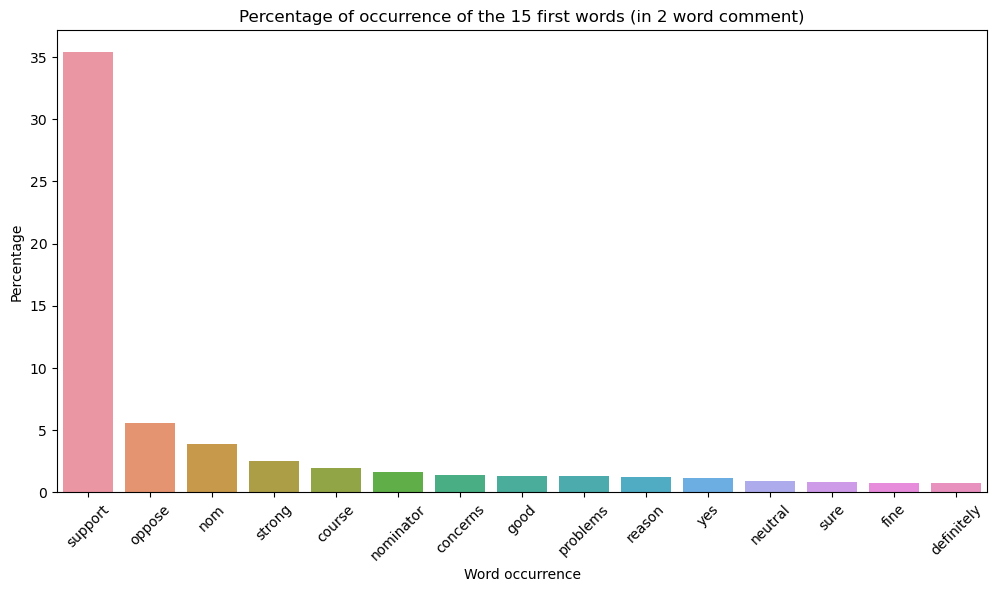

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x=percentage_2words_ind[:15].index, y=percentage_2words_ind[:15].values)
plt.xticks(rotation=45)
#plt.yscale('log')
plt.xlabel('Word occurrence')
plt.ylabel('Percentage')
plt.title('Percentage of occurrence of the 15 first words (in 2 word comment)')
plt.show()

Since taking word independently does not allow to take into account the context, we look at comment with the 2 words together. 

In [15]:
#Look at pair of word
#order word to be able to compare them
df_paired_2words = pd.DataFrame(two_words['Vectorized_Comment'].values, columns=['word'])
df_paired_2words['word'] = df_paired_2words['word'].apply(lambda x: sorted(x))

paired_2words_percentage=df_paired_2words['word'].value_counts(normalize=True)*100
print('Percentage of the 15 first pair of words when looking at 2 word comment')
paired_2words_percentage[:15]


Percentage of the 15 first pair of words when looking at 2 word comment


word
[nom, support]           7.517455
[strong, support]        4.259116
[course, support]        3.475562
[nominator, support]     2.971296
[problems, support]      2.513576
[concerns, support]      2.389449
[reason, support]        2.187742
[support, yes]           1.326610
[definitely, support]    1.256788
[support, sure]          1.249030
[absolutely, support]    1.148177
[support, thought]       1.086113
[fine, support]          1.078355
[support, tere]          0.961986
[issues, support]        0.938712
Name: proportion, dtype: float64

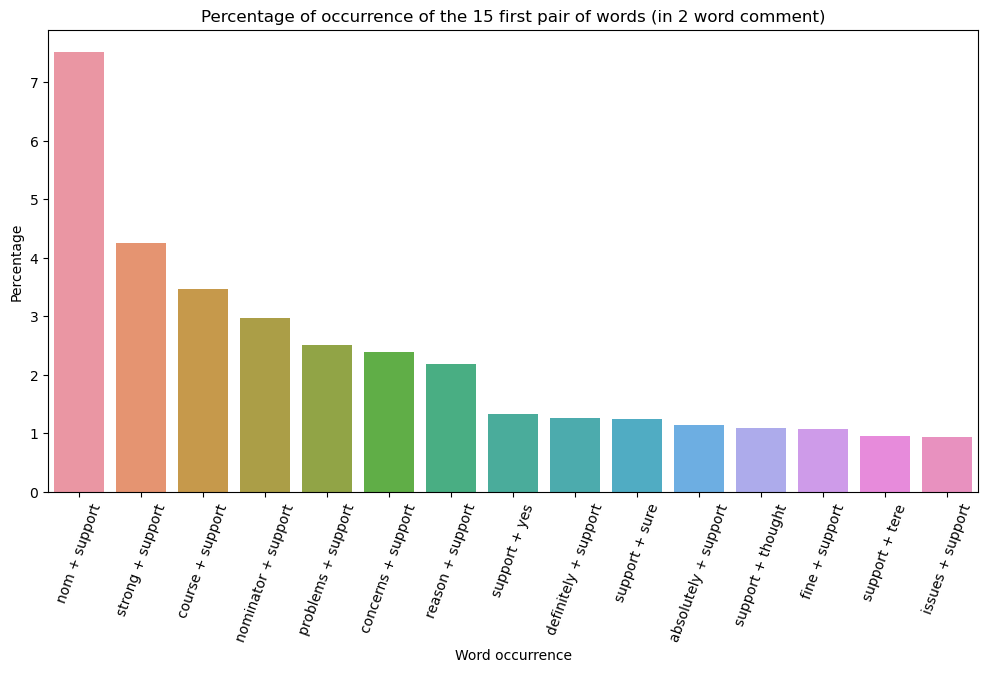

In [16]:
#convert values of x axis with the correct type for the plot
paired_strings = [' + '.join(pair) for pair in paired_2words_percentage.index]

plt.figure(figsize=(12, 6))
sns.barplot(x=paired_strings[:15], y=paired_2words_percentage[:15].values)
plt.xticks(rotation=70)
#plt.yscale('log')
plt.xlabel('Word occurrence')
plt.ylabel('Percentage')
plt.title('Percentage of occurrence of the 15 first pair of words (in 2 word comment)')
plt.show()

Generally speaking, we can see that the word "Support" is dominant in all comments of size 1 or 2. The word "oppose" appears with a high proportion for comments of one word and 2 words treated independently, whereas this is not the case for the treatment of pairs of 2 words. We would expect to see the same pattern when all the words in the comments are taken into account.

### Most frequently used words (all comments)

In [17]:
#Split the dataframe to avoid memory problem
list_of_dataframes = np.array_split(stat_df, 100)

#create word array for all small dataframe
word_array=[]
tot_nbr_words=0
for n in range(len(list_of_dataframes)):
    df_comment=pd.DataFrame(np.concatenate(list_of_dataframes[n]['Vectorized_Comment'].values), columns=['word'])
    word_array.append(df_comment)
    tot_nbr_words += len(df_comment['word'])
    

In [18]:
#count the number of word for each occurence
def compute_sum_word(df):
    return df['word'].value_counts()
count = list(map(compute_sum_word, word_array))

In [19]:
#concatenate all word-occurrence for all array
all_words_df = pd.concat(count, axis=1).T
#compute the percentage of occurrence for all words present in the comment
percentage_word = all_words_df.sum(axis=0)/tot_nbr_words*100
#order for the plot
ordered_percentage_word= percentage_word.sort_values(ascending=False)

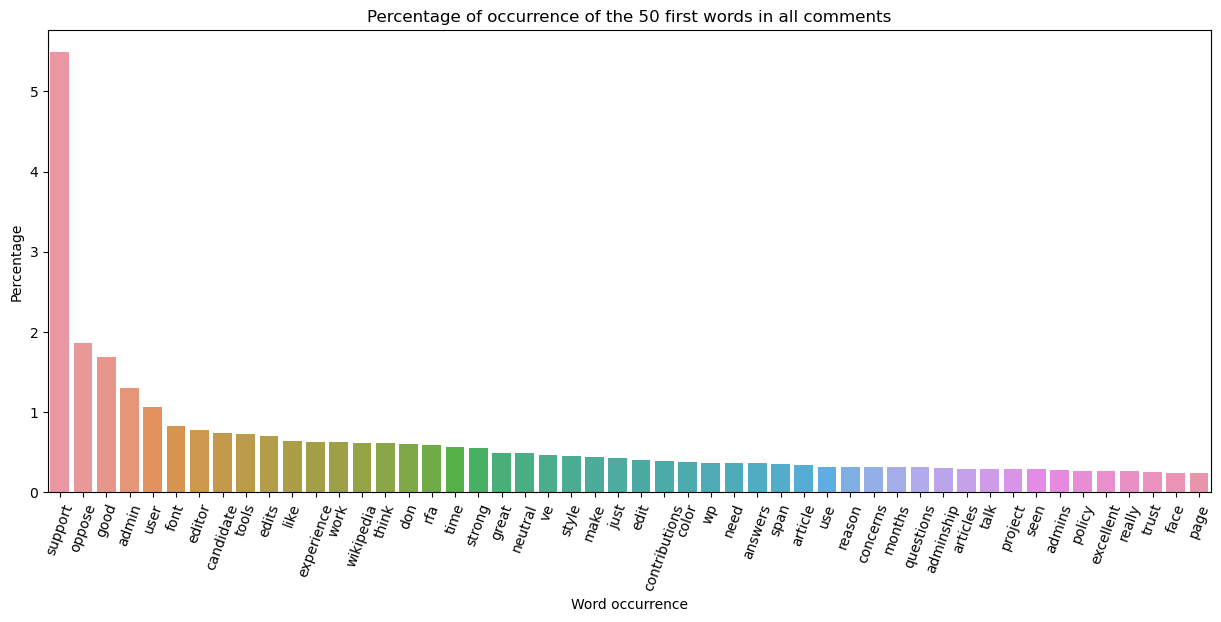

In [20]:
plt.figure(figsize=(15, 6))
sns.barplot(x=ordered_percentage_word[:50].index, y=ordered_percentage_word[:50].values)
plt.xticks(rotation=70)
plt.xlabel('Word occurrence')
plt.ylabel('Percentage')
plt.title('Percentage of occurrence of the 50 first words in all comments')
plt.show()

As expected we have the words "support" and "oppose" as the most dominant word in all comments.

## Distribution plot

Now that we looked at comments individually, we want to have a general overview of comment length.

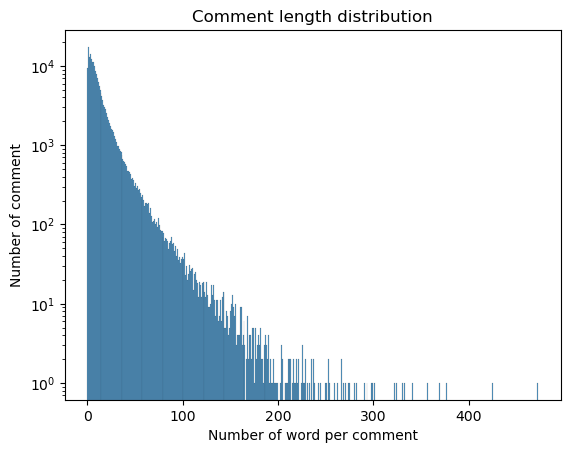

In [22]:
sns.histplot(stat_df['Vector_Size'],binwidth=1, kde=False)  
plt.title('Comment length distribution')
plt.xlabel('Number of word per comment')
plt.ylabel('Number of comment')
#plt.xlim(0,900)
plt.yscale('log') #pas sûre si ok de mettre log scale ici
plt.show()

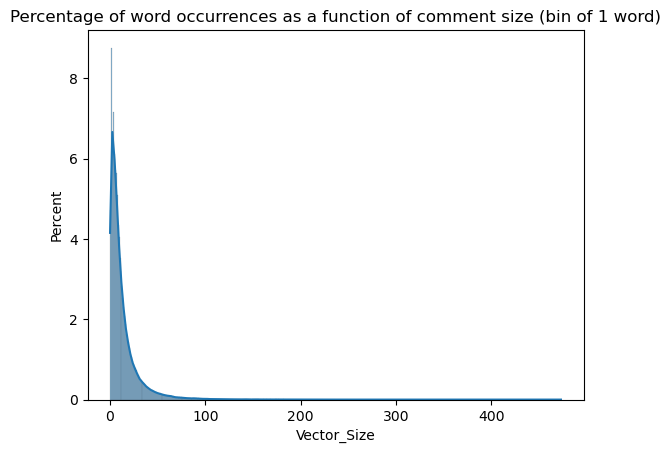

In [23]:
sns.histplot(data=stat_df, x='Vector_Size', kde=True, binwidth=1, stat='percent') 
plt.title('Percentage of word occurrences as a function of comment size (bin of 1 word)')
plt.show()

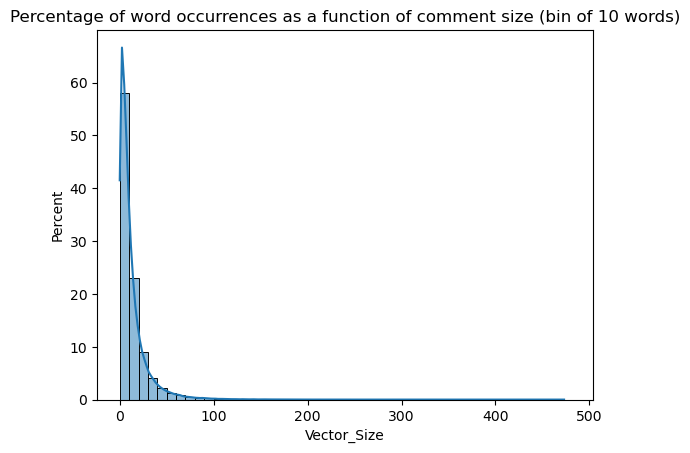

In [24]:
sns.histplot(data=stat_df, x='Vector_Size', kde=True, binwidth=10, stat='percent') #j'ai pris arbitrairement 10 mots
plt.title('Percentage of word occurrences as a function of comment size (bin of 10 words)')
plt.show()

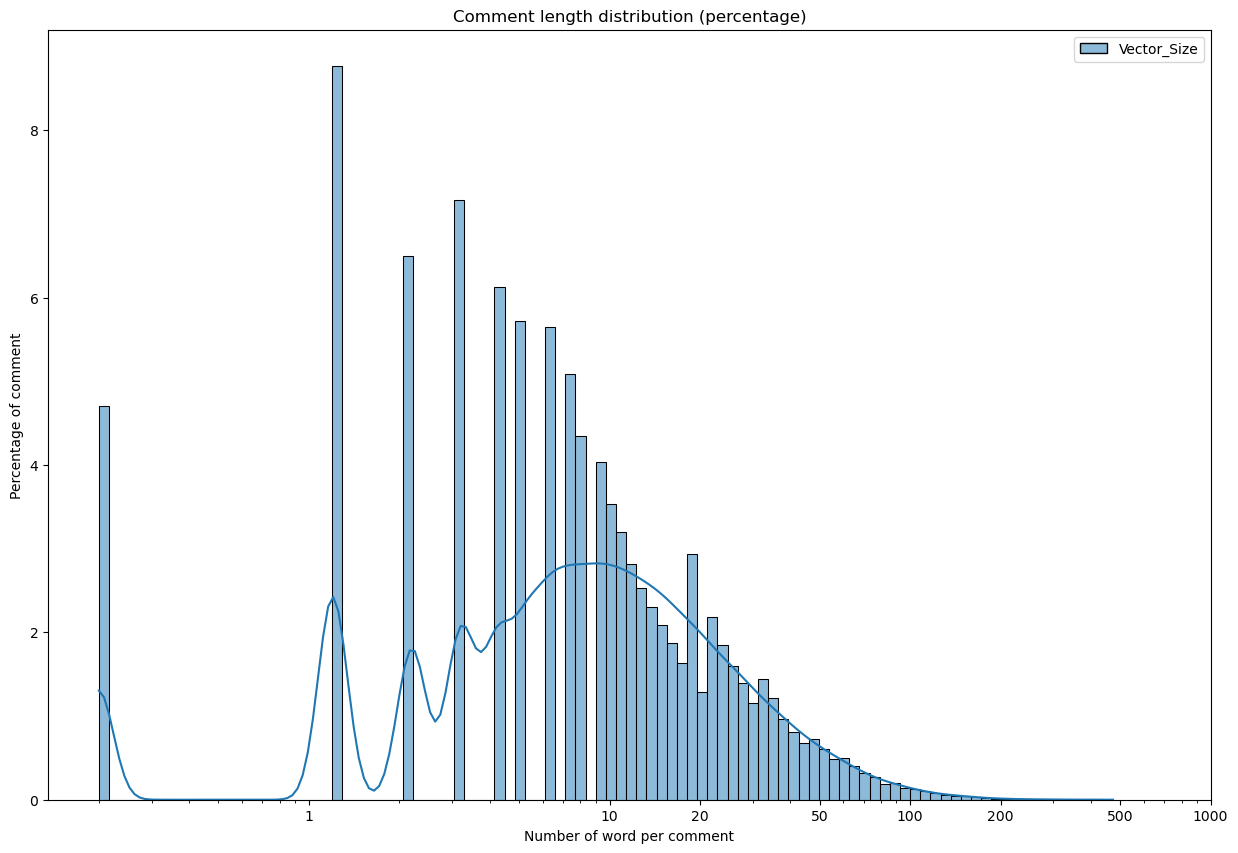

In [26]:
"""EMMA VA REGARDER POUR AVOIR UN GRAPH QUI PERMETTE DE VOIR TOUTE LA DIST D'UN COUP """

#sns.histplot(data=stat_df, x='Vector_Size', kde=True, binwidth=1, stat='percent', log_scale=(True, False)) #j'ai pris 10 arbitrairement, à changer au besoin
fig, ax = plt.subplots(figsize=(15,10))
test = stat_df #"""ATTENTION, FAIRE UNE HARD COPY POUR PAS QUE CA MODIFIE LA DATAFRAME STAT_DF AUSSI"""
test.Vector_Size = test.Vector_Size+0.1
sns.histplot(data=test, kde=True, stat='percent', log_scale=(True, False), bins=100, ax=ax) #j'ai pris 10 arbitrairement, à changer au besoin
ax.set_title('Comment length distribution (percentage)')
ax.set_xlabel('Number of word per comment')
ax.set_ylabel('Percentage of comment')
ax.set_xscale('log')
ticks = [1, 10, 20, 50, 100, 200, 500, 1000]
ax.set_xticks(ticks=ticks, labels=['1','10', '20', '50', '100', '200', '500', '1000'])
plt.show()

From these plots we can see that most comments have less than 30 words